<a href="https://colab.research.google.com/github/kosarrara/minitarea4/blob/master/minitarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EI2001 : Ciencia de Datos en Astronomía
**Profesores:** Pía Cortés, Daniela Barrientos, Matías Mattamala, Matías Suazo

##Minitarea 4: Análisis de Cubo de datos extragaláctico y querys.

###Objetivos:
1. Utilizar el paquete **astropy** para trabajar con unidades de medidas, coordenadas y fits.
2. Utilizar datos del google drive personal de cada uno.
3. Lectura de archivos *fits* en objetos extragalácticos en forma de cubo de datos.
4. Utilizar el paquete **astroquery** para hacer query de objetos del SDSS.



###Instrucciones:

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
3. Abrir [Google Colab](https://colab.research.google.com/) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
4. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
5. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
6. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.




#1. FITS en Google Drive.

En el siguiente enlace [(link)](https://docs.google.com/spreadsheets/d/1lT4h9Evwm6i2SBeuCK5dESTm8FijVZX7r6ixq-dt3ZM/edit#gid=0) se encuentra un excel con 30 galaxias observadas con CALIFA usando la técnica de Integral Field Spectroscopy (IFS). Debe escoger una galaxia que se encuentre disponible anotando su nombre en la casilla correspondiente a la galaxia que desee escoger (**No puede elegir una ya escojida por alguien más**). A cada galaxia le corresponde un link con el cual se pueden descargar los datos obtenidos por CALIFA para dicha galaxia en un cubo de datos **fits.gz**.

Descargue el archivo correspondiente y súbalo a la cuenta de Google Drive vinculada con la cuenta de Google que utiliza para trabajar con [Google Colab](https://colab.research.google.com/). Asegúrese que el archivo de descarga corresponde con la galaxia seleccionada, en caso contrario hágalo saber al equipo docente.

Ahora importe los paquetes y funciones necesarias vistas en clases para poder montar su unidad de Google drive. Si lo hace correctamente debiese aparecer un mensaje. Verifique que se muestra al correr esas líneas de código.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from google.colab import drive
from astropy.io import fits
from astropy.wcs import WCS
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2. Visualización de la Galaxia 

En esta parte debe hacer lectura del cubo de datos **fits.gz** que se encuentra guardado en su Google Drive. Importe todos los paquetes que sean necesarios, no olvide leer el header (Ya sea en su forma normal o en WCS) e imprímalo en pantalla.

In [70]:
filename=("/content/gdrive/My Drive/Tareas/NGC7824.V500.rscube.fits.gz")
hdu_fits=fits.open(filename)
hdu=fits.open(filename)[0]
header=hdu.header
wcs=WCS(header)
wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVELENGTH'  
CRVAL : 1.275811330392791  6.919860308685241  3749.0  
CRPIX : 32.0  36.0  1.0  
CD1_1 CD1_2 CD1_3  : -0.00027777777777777  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  0.000277777777777777  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  2.0  
NAXIS : 83  72  1877

Ahora haga un subplot que contemple 4 imágenes de la galaxia en 4 diferentes longitudes de onda de todo el espectro observado. Usted debe escoger estas cuatro longitudes de onda como se le antoje. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Recuerde importar los paquetes necesarios en caso de no haberlo hecho en algún bloque anterior.

**Consejo**: Dentro de las longitudes de onda, se sugiere que escoja una cercana a los 6563 Angstrom.

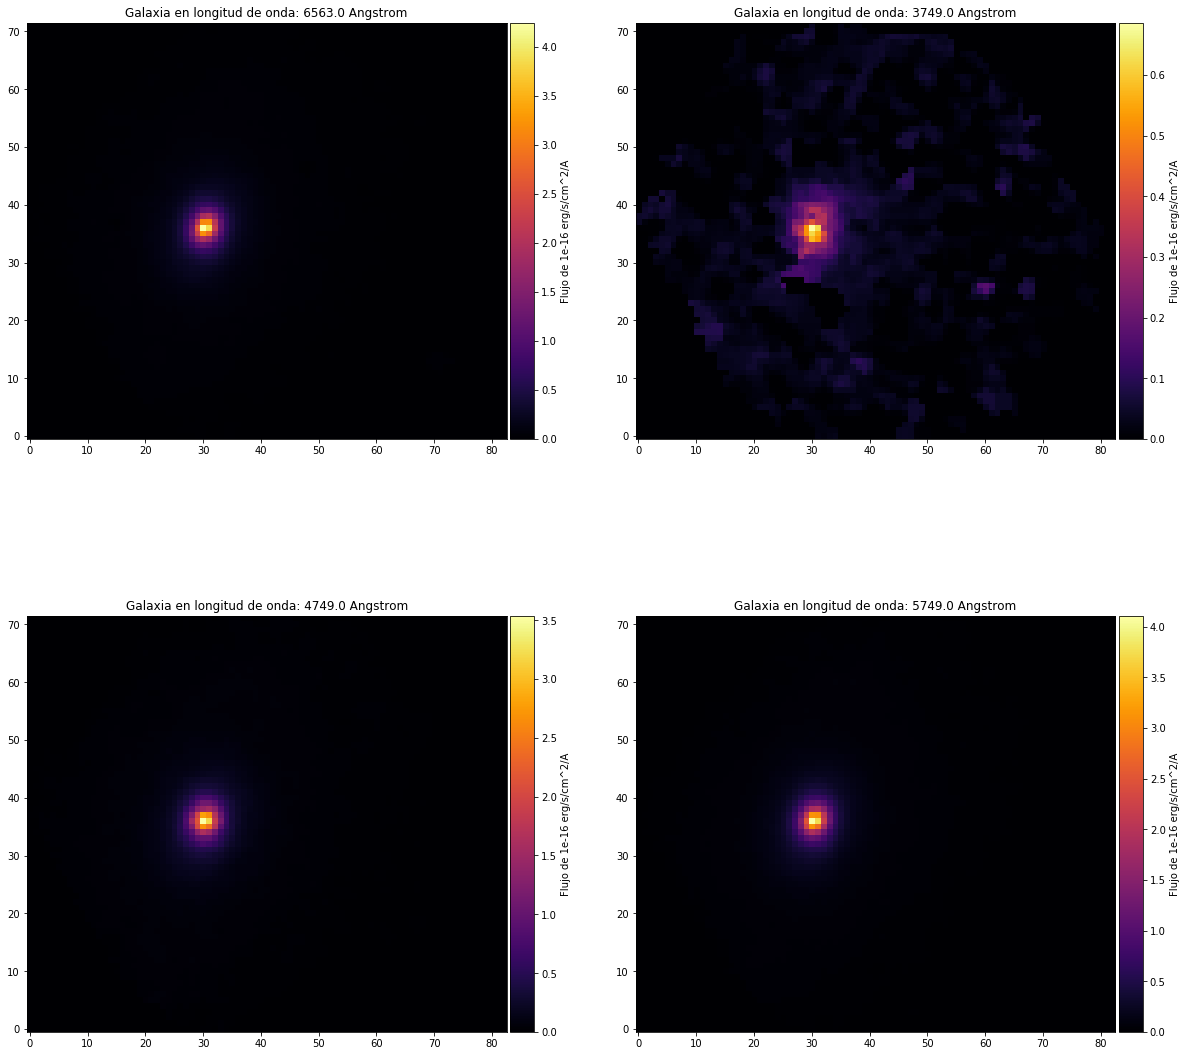

In [78]:
data=hdu.data
units=header["HIERARCH PIPE UNITS"]
initialWaveLengh=header["CRVAL3"]*u.AA
stepWaveLengh=header["CD3_3"]*u.AA
finalWaveLengh=initialWaveLengh+stepWaveLengh*(header["NAXIS3"])

#Con el valor de k podemos movernos entre las distintas longitudes de onda captadas
k=1407

WaveLengh=initialWaveLengh+np.arange(0,header["NAXIS3"])*stepWaveLengh

WaveLenghActual=initialWaveLengh+stepWaveLengh*k

fig, bx=plt.subplots(figsize=(20,20),ncols=2,nrows=2)

##########################################
imagen3=bx[0,0].imshow(data[k],cmap="inferno", origin="lower",vmin=0)
divider3 = make_axes_locatable(bx[0,0])
cax3 = divider3.append_axes('right', size='5%', pad=0.05)
cb=plt.colorbar(imagen3,cax=cax3)
cb.set_label("Flujo de "+units)
bx[0,0].set_title("Galaxia en longitud de onda: "+str(WaveLenghActual) )

bx[0,0].set_xticks((0,20,60,40,80), (round(RA[0],3),round(RA[20],3),round(RA[40],3),round(RA[60],3),round(RA[80],3)))

############################################
imagen4=bx[0,1].imshow(data[0],cmap="inferno", origin="lower",vmin=0)

divider4 = make_axes_locatable(bx[0,1])
cax4 = divider4.append_axes('right', size='5%', pad=0.05)
cb=plt.colorbar(imagen4,cax=cax4)

cb.set_label("Flujo de "+units)

bx[0,1].set_title("Galaxia en longitud de onda: "+str(WaveLengh[0]))


imagen5=bx[1,0].imshow(data[500],cmap="inferno", origin="lower",vmin=0)

divider5 = make_axes_locatable(bx[1,0])
cax5 = divider5.append_axes('right', size='5%', pad=0.05)
cb=plt.colorbar(imagen5,cax=cax5)

cb.set_label("Flujo de "+units)

bx[1,0].set_title("Galaxia en longitud de onda: "+str(WaveLengh[500]) )


imagen6=bx[1,1].imshow(data[k*0+1000],cmap="inferno", origin="lower",vmin=0)

divider6 = make_axes_locatable(bx[1,1])
cax6 = divider6.append_axes('right', size='5%', pad=0.05)
cb=plt.colorbar(imagen6,cax=cax6)

cb.set_label("Flujo de "+units)

bx[1,1].set_title("Galaxia en longitud de onda: "+str(WaveLengh[1000]) )


#COORDENADAS AND STUFF DE LOS EJES X E Y
#COORDENADAS EJE X
RA_inicio=header["CRVAL1"]
RA_step=header["CD1_1"]
RA_fin=RA_inicio+RA_step*(header["NAXIS1"])
RA=RA_inicio+np.arange(0,header["NAXIS1"])*RA_step



bx[0,0].set_xticks((0,20,60,40,80),(round(RA[0],3),round(RA[20],3),round(RA[40],3),round(RA[60],3),round(RA[80],3))) 
bx[0,1].set_xticks((0,20,60,40,80), (round(RA[0],3),round(RA[20],3),round(RA[40],3),round(RA[60],3),round(RA[80],3)))
bx[1,0].set_xticks((0,20,60,40,80), (round(RA[0],3),round(RA[20],3),round(RA[40],3),round(RA[60],3),round(RA[80],3)))
bx[1,1].set_xticks((0,20,60,40,80), (round(RA[0],3),round(RA[20],3),round(RA[40],3),round(RA[60],3),round(RA[80],3)))

#bx[0,0].set_xlabel("RA [deg]")
#bx[0,1].set_xlabel("RA [deg]")
#bx[1,0].set_xlabel("RA [deg]")
#bx[1,1].set_xlabel("RA [deg]")

#COORDENADAS EJE Y
#DEC_inicio=header["CRVAL2"]
#DEC_step=header["CD2_2"]
#DEC_fin=DEC_inicio+DEC_step*(header["NAXIS2"])
#DEC=DEC_inicio+DEC_step*np.arange(0,header["NAXIS2"])
#plt.yticks((0,20,40,60),(round(DEC[0],3),round(DEC[20],3),round(DEC[40],3),round(DEC[60],3)))
#plt.ylabel("DEC [deg]")


#3. Espectros de la Galaxia

Como saben, a cada pixel le corresponde un espectro. Ahora haga un subplot que contemple el espectro de 9 pixeles de la galaxia. 8 de los 9 pixeles deben ser escogidos al azar, mientras que uno de ellos debe corresponder al espectro de los pixeles de referencia que el header indica. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Recuerde importar los paquetes necesarios en caso de no haberlo hecho en algún bloque anterior.

Finalmente calcule el redshift al cual se encuentra el objeto, para ello puede indentificar las líneas de los espectros obtenidos en esta [página](http://skyserver.sdss.org/dr15/en/tools/chart/navi.aspx). El cálculo del redshift debe hacerse con la información de los espectros del fits. Ignore la rotación de la galaxia. 

**Hint:** Le puede ser útil saber que la línea de H$\alpha$ se encuentra centrada en 6563 Angstroms. La longitud de onda de las primeras líneas de la serie de Balmer las puede encontrar en [aquí](https://es.wikipedia.org/wiki/L%C3%ADneas_de_Balmer). Imprima en pantalla la operación a realizar y que línea o líneas usó para determinar el redshift al cual se encuentra la galaxia.

NameError: ignored

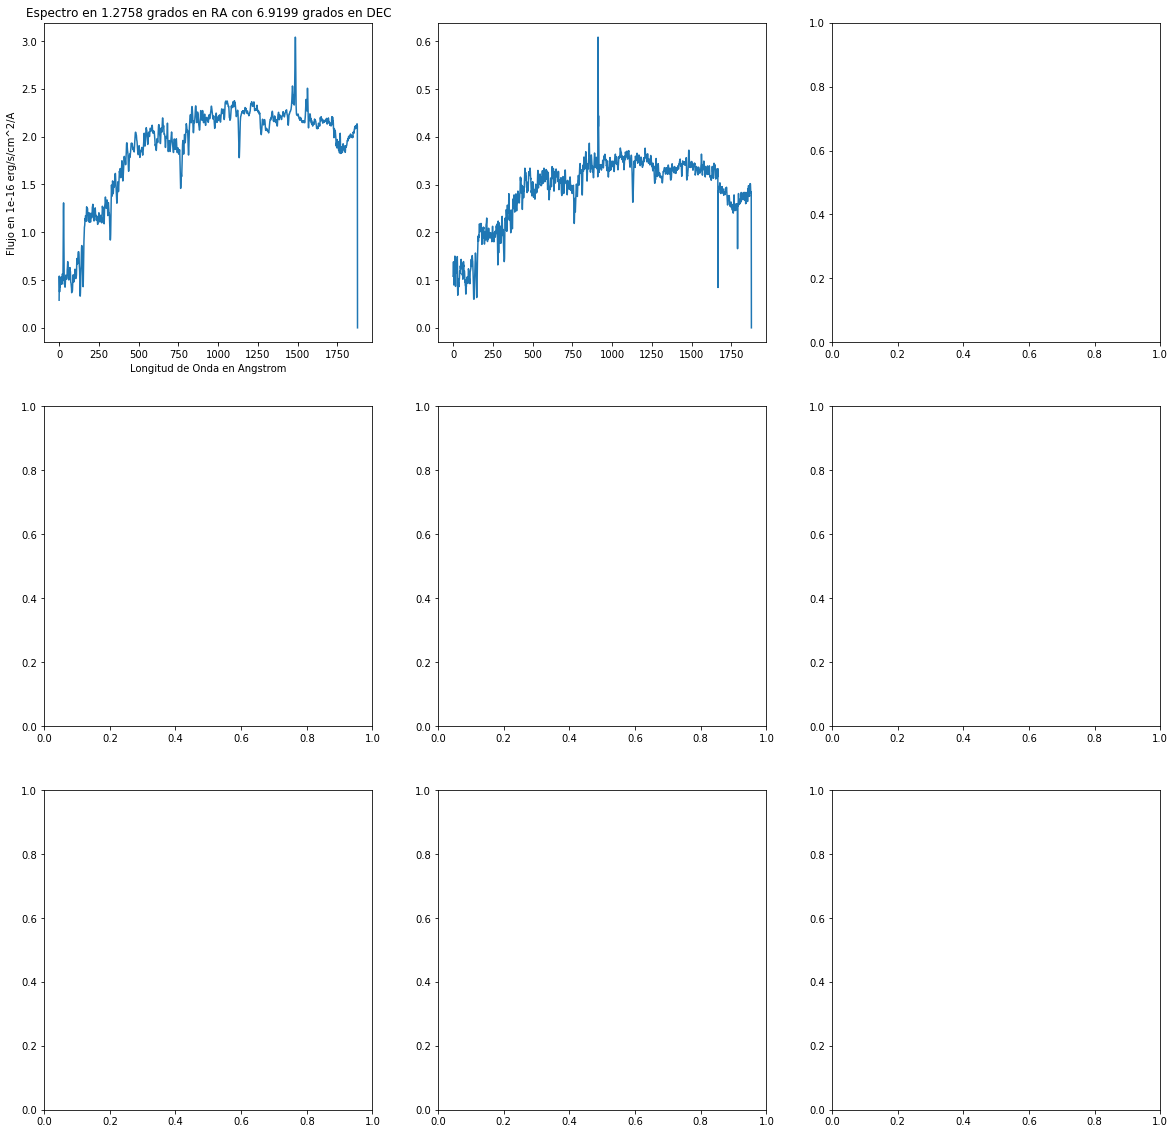

In [56]:
#Haré un filtro para encontrar la galaxia, haciendo una seleccion con los pixeles que tienen un flujo mayor o igual a 2
import random

#El intervalo 25,45 y el intervalo 20,40 son los intervalos en pixeles respectivos en los que está 
#la galaxia de la imagen en el eje x e y respectivamente, esto con el fin de evitar que aparezcan
#Lineas horizontales con flujo 0 en alguno de los gráficos

DEC1=random.randint(25,45)
DEC2=random.randint(25,45)
DEC3=random.randint(25,45)
DEC4=random.randint(25,45)
DEC5=random.randint(25,45)
DEC6=random.randint(25,45)
DEC7=random.randint(25,45)
DEC8=random.randint(25,45)

RA1=random.randint(20,40)
RA2=random.randint(20,40)
RA3=random.randint(20,40)
RA4=random.randint(20,40)
RA5=random.randint(20,40)
RA6=random.randint(20,40)
RA7=random.randint(20,40)
RA8=random.randint(20,40)

Recorte1=data[:,DEC1,RA1]
Recorte2=data[:,DEC2,RA2]
Recorte3=data[:,DEC3,RA3]
Recorte4=data[:,DEC4,RA4]
Recorte5=data[:,DEC5,RA5]
Recorte6=data[:,DEC6,RA6]
Recorte7=data[:,DEC7,RA7]
Recorte8=data[:,DEC8,RA8]
RecorteReferencia=data[:,header["CRPIX2"],header["CRPIX1"]]

fig, ax=plt.subplots(figsize=(20,20),ncols=3,nrows=3)

ax[0,0].plot(RecorteReferencia)
ax[0,0].set_xticks((0,250,500,750,1000,1250,1500,1750),(WaveLengh[0],WaveLengh[250],WaveLengh[500],WaveLengh[750],WaveLengh[1000],WaveLengh[1250],WaveLengh[1500],WaveLengh[1750]))
ax[0,0].set_xlabel("Longitud de Onda en Angstrom")
ax[0,0].set_ylabel("Flujo en "+units)
ax[0,0].set_title("Espectro en "+str(round(header["CRVAL1"],4))+" grados en RA con "+str(round(header["CRVAL2"],4))+ " grados en DEC")

ax[0,1].plot(Recorte1)
ax[0,1].set_title("Espectro en "+str(round(RA[RA1],4))+" grados en RA con "+str(round(DEC[DEC1],4))+ " grados en DEC")
ax[0,1].set_xticks((0,250,500,750,1000,1250,1500,1750),(WaveLengh[0],WaveLengh[250],WaveLengh[500],WaveLengh[750],WaveLengh[1000],WaveLengh[1250],WaveLengh[1500],WaveLengh[1750]))
ax[0,1].set_xlabel("Longitud de Onda en Angstrom")
ax[0,1].set_ylabel("Flujo en "+units)

ax[0,2].plot(Recorte2)
ax[0,2].set_title("Espectro en "+str(round(RA[RA2],4))+" grados en RA con "+str(round(DEC[DEC2],4))+ " grados en DEC")
ax[0,2].set_xticks((0,250,500,750,1000,1250,1500,1750),(WaveLengh[0],WaveLengh[250],WaveLengh[500],WaveLengh[750],WaveLengh[1000],WaveLengh[1250],WaveLengh[1500],WaveLengh[1750]))
ax[0,2].set_xlabel("Longitud de Onda en Angstrom")
ax[0,2].set_ylabel("Flujo en "+units)

ax[1,0].plot(Recorte3)
ax[1,0].set_title("Espectro en "+str(round(RA[RA3],4))+" grados en RA con "+str(round(DEC[DEC3],4))+ " grados en DEC")
ax[1,0].set_xticks((0,250,500,750,1000,1250,1500,1750),(WaveLengh[0],WaveLengh[250],WaveLengh[500],WaveLengh[750],WaveLengh[1000],WaveLengh[1250],WaveLengh[1500],WaveLengh[1750]))
ax[1,0].set_xlabel("Longitud de Onda en Angstrom")
ax[1,0].set_ylabel("Flujo en "+units)

ax[1,1].plot(Recorte4)
ax[1,1].set_title("Espectro en "+str(round(RA[RA4],4))+" grados en RA con "+str(round(DEC[DEC4],4))+ " grados en DEC")
ax[1,1].set_xticks((0,250,500,750,1000,1250,1500,1750),(WaveLengh[0],WaveLengh[250],WaveLengh[500],WaveLengh[750],WaveLengh[1000],WaveLengh[1250],WaveLengh[1500],WaveLengh[1750]))
ax[1,1].set_xlabel("Longitud de Onda en Angstrom")
ax[1,1].set_ylabel("Flujo en "+units)

ax[1,2].plot(Recorte5)
ax[1,2].set_title("Espectro en "+str(round(RA[RA5],4))+" grados en RA con "+str(round(DEC[DEC5],4))+ " grados en DEC")
ax[1,2].set_xticks((0,250,500,750,1000,1250,1500,1750),(WaveLengh[0],WaveLengh[250],WaveLengh[500],WaveLengh[750],WaveLengh[1000],WaveLengh[1250],WaveLengh[1500],WaveLengh[1750]))
ax[1,2].set_xlabel("Longitud de Onda en Angstrom")
ax[1,2].set_ylabel("Flujo en "+units)

ax[2,0].plot(Recorte6)
ax[2,0].set_title("Espectro en "+str(round(RA[RA6],4))+" grados en RA con "+str(round(DEC[DEC6],4))+ " grados en DEC")
ax[2,0].set_xticks((0,250,500,750,1000,1250,1500,1750),(WaveLengh[0],WaveLengh[250],WaveLengh[500],WaveLengh[750],WaveLengh[1000],WaveLengh[1250],WaveLengh[1500],WaveLengh[1750]))
ax[2,0].set_xlabel("Longitud de Onda en Angstrom")
ax[2,0].set_ylabel("Flujo en "+units)

ax[2,1].plot(Recorte7)
ax[2,1].set_title("Espectro en "+str(round(RA[RA7],4))+" grados en RA con "+str(round(DEC[DEC7],4))+ " grados en DEC")
ax[2,1].set_xticks((0,250,500,750,1000,1250,1500,1750),(WaveLengh[0],WaveLengh[250],WaveLengh[500],WaveLengh[750],WaveLengh[1000],WaveLengh[1250],WaveLengh[1500],WaveLengh[1750]))
ax[2,1].set_xlabel("Longitud de Onda en Angstrom")
ax[2,1].set_ylabel("Flujo en "+units)

ax[2,2].plot(Recorte8)
ax[2,2].set_title("Espectro en "+str(round(RA[RA8],4))+" grados en RA con "+str(round(DEC[DEC8],4))+ " grados en DEC")
ax[2,2].set_xticks((0,250,500,750,1000,1250,1500,1750),(WaveLengh[0],WaveLengh[250],WaveLengh[500],WaveLengh[750],WaveLengh[1000],WaveLengh[1250],WaveLengh[1500],WaveLengh[1750]))
ax[2,2].set_xlabel("Longitud de Onda en Angstrom")
ax[2,2].set_ylabel("Flujo en "+units)


#4. Coordenadas

En esta parte deben crear una variable que contenga un objeto SkyCoord definido con los dos últimos dígitos de rut como ascención recta y declinación en el sistema ICRS (No contar el dígito verificador).

**Ejemplo:** si su RUT es 12.345.678 - 9. La ascención recta y declinación para ese objeto debe ser 78°. Si los úlitmos dos dígitos son mayores que noventa, utilice solo el último.

In [5]:
rut=SkyCoord(ra=41*u.degree,dec=41*u.degree, frame="icrs")
rut

<SkyCoord (ICRS): (ra, dec) in deg
    (41., 41.)>

#5. Query: Imagen

En esta parte haga un query a los datos del SDSS utilizando como coordenadas las definidas anteriormente en una región de radio 10 arcsec, además, asegúrese que los objetos de la busqueda cuentan con un espectro. En caso de no encontrar algo, multiplique el radio por 2 hasta encontrar un objeto. Extraiga el espectro y la fotometría en las bandas z e i.

Imprima en pantalla el WCS header de alguno de los fits fotometría, y proceda a graficar las regiones mostradas en los dos fits fotométricos descargados. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Como los datos son del SDSS, ustedes encontraran una imagen de la placa entera, hagan un zoom mostrando de forma cercana el objeto que les debiese haber salido al azar, queda a su criterio cuanto deben ampliar la imagen ustedes.

In [13]:
!pip install astroquery
from astroquery.sdss import SDSS
position=SDSS.query_region(rut, radius=1.5*8192*u.arcsec, spectro=True)
print position

#Multiplqué por un numero menor a 2 al final debido a la cantidad de memoria que ocupaba

       ra              dec               objid        ... run2d instrument
---------------- ---------------- ------------------- ... ----- ----------
44.2401378356339 37.6349843198434 1237670962166432084 ...    26       SDSS
44.2901948753421 37.6479905526953 1237670962166432185 ...    26       SDSS
 44.331015522387 37.6140154850596 1237670962166432592 ...    26       SDSS
44.2943128260424 37.7840213325928 1237670962166497591 ...    26       SDSS
44.3002856505418 37.7251525700197 1237670962166497852 ...    26       SDSS
44.3629729937173 37.7172041622624 1237670962166497895 ...    26       SDSS
44.2879112982732 37.7972248979118 1237670962166498015 ...    26       SDSS
44.3389564868611 37.8838400651181 1237670962166563014 ...    26       SDSS
 44.374315646859 37.9397305504504 1237670962166563166 ...    26       SDSS
44.3818821510915 37.8925305596375 1237670962166563490 ...    26       SDSS
44.3556794719512 37.9338011740815 1237670962166563557 ...    26       SDSS
44.3996205688873 37.95214

In [0]:
espectro=SDSS.get_spectra(matches=position)
fotoz=SDSS.get_images(matches=position, band="z")
fotoi=SDSS.get_images(matches=position, band="i")

fit1=fotoz[0]
header1=fit1[0]
wcs1=WCS(header1)

fit2=fotoi[0]
header2=fit2[0]
wcs2=WCS(header2)

In [15]:
print wcs1
print wcs2

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 44.2303651124  37.591980017  
CRPIX : 1025.0  745.0  
CD1_1 CD1_2  : -9.55737449682e-05  5.45332237966e-05  
CD2_1 CD2_2  : 5.44950864921e-05  9.55157455151e-05  
NAXIS : 2048  1489
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 44.2306353613  37.5925213972  
CRPIX : 1025.0  745.0  
CD1_1 CD1_2  : -9.56010565063e-05  5.45034589252e-05  
CD2_1 CD2_2  : 5.4545952385e-05  9.55223460262e-05  
NAXIS : 2048  1489


Text(0,0.5,'DEC [deg]')

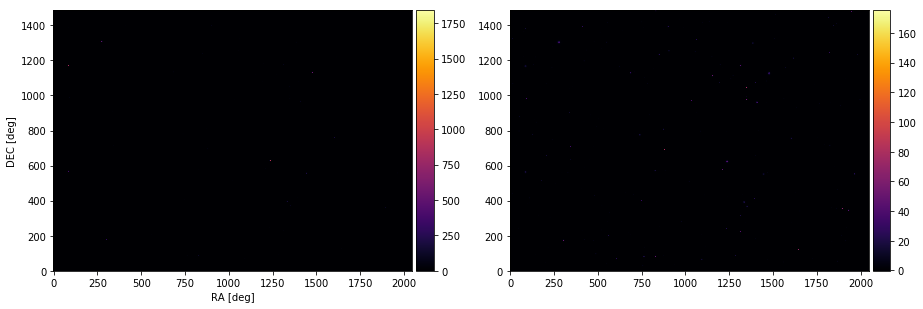

In [48]:
#Grafico
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax=plt.subplots(figsize=(15,10),ncols=2)
imagen1=ax[0].imshow(fit1[0].data, cmap="inferno",origin="lower")

divider1 = make_axes_locatable(ax[0])
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
plt.colorbar(imagen1,cax=cax1)

imagen2=ax[1].imshow(fit2[0].data, cmap="inferno",origin="lower")
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
plt.colorbar(imagen2,cax=cax2)

#COORDENADAS EJE X
#RA_inicio=header1["CRVAL1"]
#RA_step=header1["CD1_1"]
#RA_fin=RA_inicio+RA_step*(header1["NAXIS1"])
#RA=RA_inicio+np.arange(0,header1["NAXIS1"])*RA_step
#ax[0].set_xticks((0,500,1000,1500,2000), (round(RA[0],3),round(RA[500],3),round(RA[1000],3),round(RA[1500],3),round(RA[2000],3)))
ax[0].set_xlabel("RA [deg]")

#COORDENADAS EJE Y
#DEC_inicio=header1["CRVAL2"]
#DEC_step=header1["CD2_2"]
#DEC_fin=DEC_inicio+DEC_step*(header1["NAXIS2"])
#DEC=DEC_inicio+DEC_step*np.arange(0,header1["NAXIS2"])
#ax[0].yticks((0,500,1000,1400),(round(DEC[0],3),round(DEC[500],3),round(DEC[1000],3),round(DEC[1400],3)))
ax[0].set_ylabel("DEC [deg]")

#6. Query: Espectro

En esta parte haga un gráfico con los datos espectroscópicos del objeto encontrado. Imprima en pantalla el WCS header. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Compare el objeto con el encontrado en esta [página](http://skyserver.sdss.org/dr15/en/tools/chart/navi.aspx), identifique las líneas y hagan que se vean en el espectro bien señalizadas.